In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    # Genera ruido gaussiano
    gaussian_noise = np.random.normal(mean, stddev, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

def add_exponential_noise(image, scale, contamination_percentage):
    # Genera ruido exponencial
    exponential_noise = np.random.exponential(scale, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] * exponential_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

def main(image_path, gaussian_mean, gaussian_stddev, gaussian_percentage, exp_scale, exp_percentage):
    # Carga la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        print(f"No se pudo cargar la imagen desde {image_path}")
        return

    # Aplica ruido gaussiano y exponencial
    gaussian_noisy_image = add_gaussian_noise(image, gaussian_mean, gaussian_stddev, gaussian_percentage)
    exponential_noisy_image = add_exponential_noise(image, exp_scale, exp_percentage)

    # Visualiza la imagen original y las imágenes con ruido
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Imagen Original")
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Ruido Gaussiano")
    plt.imshow(gaussian_noisy_image, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Ruido Exponencial")
    plt.imshow(exponential_noisy_image, cmap='gray')

    plt.tight_layout()
    plt.show()

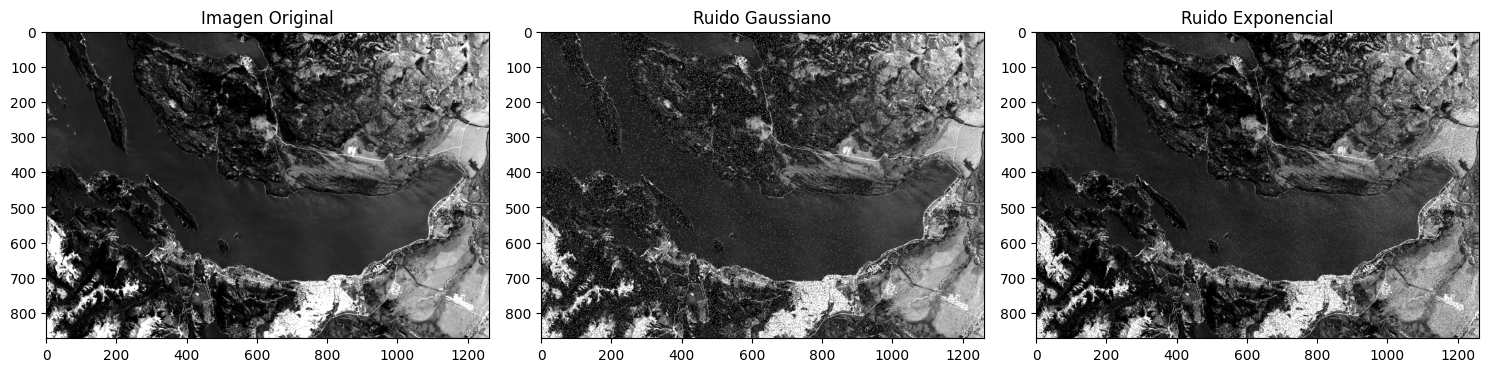

In [2]:

# Parámetros de entrada
image_path = "bariloche2/B1.tif"
gaussian_mean = 0       # Media del ruido gaussiano
gaussian_stddev = 25    # Desviación estándar del ruido gaussiano
gaussian_percentage = 20  # Porcentaje de contaminación gaussiana
exp_scale = 1.0          # Parámetro de escala del ruido exponencial
exp_percentage = 15      # Porcentaje de contaminación exponencial

main(image_path, gaussian_mean, gaussian_stddev, gaussian_percentage, exp_scale, exp_percentage)
